### 1. Load functions from load_h5.py

The functions needed to import and analyze RTXI h5 files in Python are saved in the file **load_h5.py**. Use the code below to load them into this notebook.

In [1]:
from load_h5 import *

### 2. Load your trial data

In the current directory, create a folder called **data** and copy your .h5 file into this folder. Once you've done that, change the `filename` variable in the code below to the name of your file in the **data** folder (it should end in **.h5**) as follows:
```
'YOUR_FILE_NAME.h5'
```

Set the `trial_number` variable to an integer that corresponds to your desired trial number. If you don't know your trial number, try a few out, starting from 1 and counting up. The code below will save the data to the variable `recorded_data`. You can adjust the `trial_number` variable until you find the data you want. If you want it to print the tags and plot the voltage/current curves for the given trial, set `does_plot` to `True`.

         Time    Description
0    7.695947    spontaneous
1   48.383778     IK1_sf_pt5
2  120.607501  pacing_pt5_hz
3  231.198848    pacing_1_hz
4  342.302542    pacing_2_hz


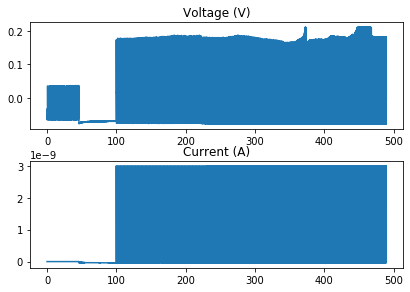

In [26]:
filename = 'attempt_2_071519.h5'
trial_number = 6
does_plot = True
recorded_data = load_recorded_data(filename, trial_number, does_plot)

### 3. Calculate and save action potential features

If you've already run the `get_ap_features` function on the current data set, do part **B**. If not, do part **A**.
#### A.
The code below will create a DataFrame with lots of useful information on the entire data set. The DataFrame will be saved to the variable `ap_features`. It will also be saved to a new file in the **data** folder. Change `filename` to what you would like the new file to be named.

In [15]:
filename = 'trial_6_data'
ap_features = get_ap_features(recorded_data, filename)

#### B.

The function below will load the saved DataFrame with the features of your data set. The DataFrame will be saved to the variable `ap_features`. Change `filename` to the name of the file your DataFrame is saved to.

In [27]:
filename = 'trial_6_data'
ap_features = load_ap_features(filename)

### 4. Summarize action potentials by frequency

After creating the data table, you can use it to find what kinds of action potentials are in your data. The code below will tell you how many APs of each class are in your data. Set `does_plot` to `True` if you would also like it to plot one action potential from each class.

48 spontaneous action potentials
65 non_spontaneous_0.5_Hz action potentials
109 non_spontaneous_1.0_Hz action potentials
300 non_spontaneous_2.0_Hz action potentials


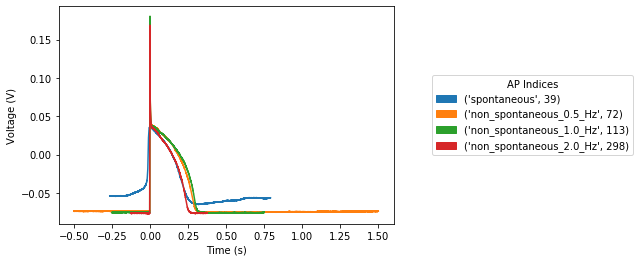

In [29]:
does_plot = True
class_tags = get_class_tags(recorded_data, ap_features, does_plot)

### 5. Plot all single action potentials

This function below will first make a list containing the DataFrame for every action potential and save it to `all_saps`. It will then create an interactive plot of the action potentials with a slider. Move the slider to plot different action potentials in the data.

In [22]:
all_saps = get_saps_from_data_table(recorded_data, ap_features)
plot_sap_slider(all_saps)

interactive(children=(IntSlider(value=261, description='ap_number', max=522, min=1), Output()), _dom_classes=(…

### 6. Graph action potential features

This function will plot information across the entire DataFrame. Use the **feature** dropdown menu to select the feature of the action potentials you want to plot.

In [28]:
graph_column_interact(ap_features)

interactive(children=(Dropdown(description='feature', options=('cycle lengths', 'diastolic intervals', 'restit…